In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import random

from scipy.stats import linregress

In [2]:
# Kaggle cmd will download zip to current file directory -kaggle.json in User folder .kaggle folder
!kaggle datasets download -d zynicide/wine-reviews --force -p ../Resources


  0%|          | 0.00/50.9M [00:00<?, ?B/s]
  2%|1         | 1.00M/50.9M [00:00<00:19, 2.72MB/s]
  4%|3         | 2.00M/50.9M [00:00<00:15, 3.31MB/s]
  6%|5         | 3.00M/50.9M [00:00<00:12, 3.91MB/s]
  8%|7         | 4.00M/50.9M [00:00<00:10, 4.47MB/s]
 10%|9         | 5.00M/50.9M [00:01<00:13, 3.63MB/s]
 12%|#1        | 6.00M/50.9M [00:01<00:11, 4.05MB/s]
 14%|#3        | 7.00M/50.9M [00:01<00:09, 4.70MB/s]
 16%|#5        | 8.00M/50.9M [00:01<00:08, 5.21MB/s]
 18%|#7        | 9.00M/50.9M [00:02<00:09, 4.65MB/s]
 20%|#9        | 10.0M/50.9M [00:02<00:09, 4.31MB/s]
 22%|##1       | 11.0M/50.9M [00:02<00:10, 3.96MB/s]
 24%|##3       | 12.0M/50.9M [00:03<00:11, 3.52MB/s]
 26%|##5       | 13.0M/50.9M [00:03<00:12, 3.22MB/s]
 28%|##7       | 14.0M/50.9M [00:03<00:12, 3.08MB/s]
 29%|##9       | 15.0M/50.9M [00:04<00:12, 2.98MB/s]
 31%|###1      | 16.0M/50.9M [00:04<00:11, 3.17MB/s]
 33%|###3      | 17.0M/50.9M [00:04<00:10, 3.53MB/s]
 35%|###5      | 18.0M/50.9M [00:04<00:08, 3.97MB/s]
 

In [3]:
# Unzip Kaggle Data
import zipfile

Dataset = "wine-reviews"

# Will unzip the files so that you can see them..
with zipfile.ZipFile(f"../Resources/{Dataset}.zip","r") as z:
    z.extractall("../Resources")

In [4]:
# Reading csv and cleaning column names
df = pd.read_csv('../Resources/winemag-data-130k-v2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
# pandas drop a column with drop function
df.drop(['taster_twitter_handle','taster_name'], axis=1, inplace=True)

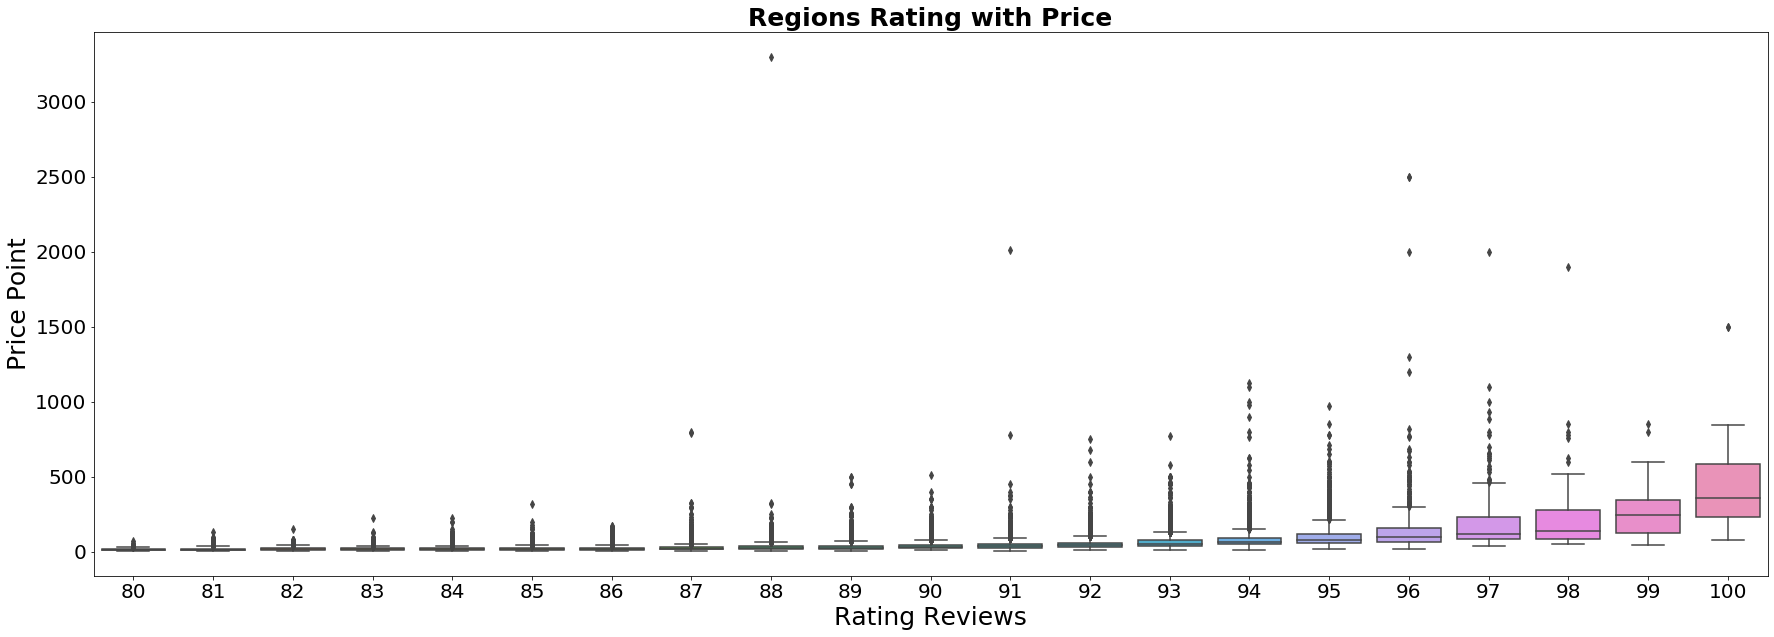

In [6]:
# Create a Box Plot for the regions with rating and price
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='price', data=df)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Regions Rating with Price', fontweight="bold", size=25) # Title
ax.set_ylabel('Price Point', fontsize = 25) # Y label
ax.set_xlabel('Rating Reviews', fontsize = 25) # X label

# Save the figure
plt.savefig(f"../Analysis/png_output/boxplot")

plt.show()

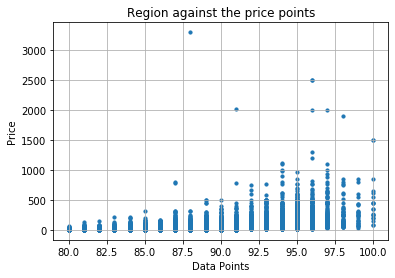

In [7]:
# Build a scatter plot the region against the price points
plt.scatter(df["points"], df["price"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Region against the price points")
plt.ylabel("Price")
plt.xlabel("Data Points")
plt.grid(True)

# Save the figure
plt.savefig(f"../Analysis/png_output/provinceratingprice")

# Show plot
plt.show()

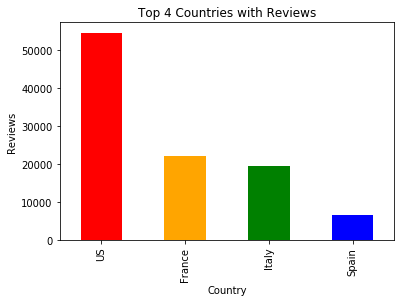

In [10]:
# sort by top countries
country = df['country'].value_counts()
country1 = country.iloc[0:4]

# sort by the price
price = df['price'].value_counts()
price1 = price.iloc[0:4]

# sort by the regions
region = df['region_1'].value_counts()
region1 = region.iloc[0:4]

# Created a bar graph that show top 4 countries with it reviews
country1.plot(kind='bar', color=['red', 'orange', 'green', 'blue'])

# Give our chart some labels and a tile
plt.title("Top 4 Countries with Reviews")
plt.xlabel("Country")
plt.ylabel("Reviews")
plt.savefig(f"../Analysis/png_output/wine_base_on_countries")
plt.show()

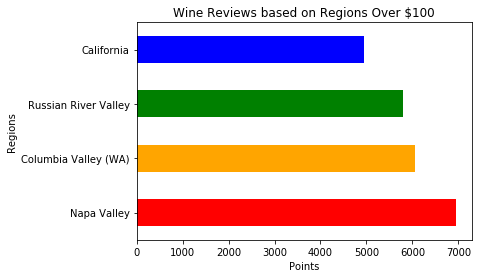

In [11]:
# Show a graph which wines that have reviews based on over $100
price1.plot(kind ='barh', color=['red', 'orange', 'green', 'blue'])
region1.plot(kind = 'barh', color=['red', 'orange', 'green', 'blue'])

# Give our chart some labels and a tile
plt.title("Wine Reviews based on Regions Over $100")
plt.xlabel("Points")
plt.ylabel("Regions")
plt.savefig(f"../Analysis/png_output/Price_regions")
plt.show()

In [12]:
# The maximum x value for our chart will be 50000
x_limit = 50000

# List of values from 0 to 50000 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
data = [random.random() for value in x_axis]

In [13]:
# Group by Country and Different regions
grouped_df = df.groupby(['country'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

In [14]:
# Group by region 1
grouped_df = df.groupby(['region_1'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

# In order to be visualized, a data function must be used...
grouped_df.count().head()

,country,description,designation,points,price,province,region_2,title,variety,winery
region_1,,,,,,,,,,
Abruzzo,6,6,5,6,6,6,0,6,6,6
Adelaida District,110,110,91,110,110,110,110,110,110,110
Adelaide,16,16,15,16,16,16,0,16,16,16
Adelaide Hills,107,107,66,107,105,107,0,107,107,107
Adelaide Plains,4,4,0,4,4,4,0,4,4,4


In [15]:
# group by region 2
grouped_df = df.groupby(['region_2'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

# In order to be visualized, a data function must be used...
grouped_df.count().head()

,country,description,designation,points,price,province,region_1,title,variety,winery
region_2,,,,,,,,,,
California Other,2663,2663,1261,2663,2661,2663,2663,2663,2663,2663
Central Coast,11065,11065,7902,11065,10975,11065,11065,11065,11065,11065
Central Valley,1062,1062,678,1062,1058,1062,1062,1062,1062,1062
Columbia Valley,8103,8103,5572,8103,8058,8103,8103,8103,8103,8103
Finger Lakes,1777,1777,1232,1777,1768,1777,1777,1777,1777,1777


In [16]:
# group each regions for different countries
group_country = pd.DataFrame(df.groupby('country')['region_1'].count())
group_country.sort_values(by='region_1', ascending=False)
group_country.head()

,region_1
country,
Argentina,3747
Armenia,0
Australia,2327
Austria,0
Bosnia and Herzegovina,0


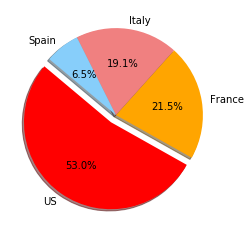

In [17]:
# Labels for the sections of our pie chart
labels = ["US", "France", "Italy", "Spain"]

# The values of each section of the pie chart
sizes = [54226, 22017, 19513, 6637]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "Yellow", "Purple","Green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig(f"../Analysis/png_output/piechartcountries")
plt.show()

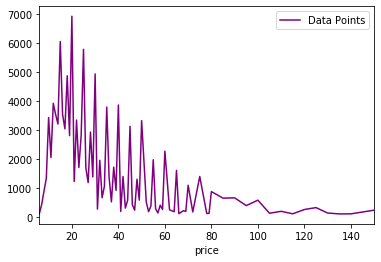

In [18]:
# Group by country and price
df_price = df.groupby('price').count()
df_price[df_price['country'] > 100]

# region with price data points
df_price = df.groupby('price').count()
df_price_only = pd.DataFrame(df_price[df_price['country'] > 100] ['country']).rename(columns={'country':'Data Points'})
df_price_only.plot(kind = 'line', color=['purple'])
plt.savefig(f"../Analysis/png_output/regionpricedatapoints")
plt.show()

In [19]:
group_region = pd.DataFrame(df.groupby('region_2')['points'].count())
group_region.sort_values(by='points', ascending=False)
group_region.head()

,points
region_2,
California Other,2663
Central Coast,11065
Central Valley,1062
Columbia Valley,8103
Finger Lakes,1777


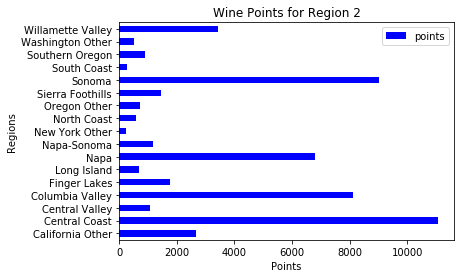

In [20]:
# Wine points for region 2
group_region.plot(kind ='barh', color=['blue'])

# Give our chart some labels and a tile
plt.title("Wine Points for Region 2")
plt.xlabel("Points")
plt.ylabel("Regions")
plt.savefig(f"../Analysis/png_output/winepointsregion2")
plt.show()

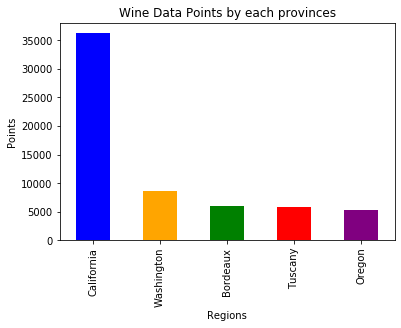

In [21]:
# Sort by each province to find the output
province = df['province'].value_counts()
province = province.iloc[0:5]

# Chart provinces by wine data set
province.plot(kind ='bar', color=['blue', 'orange', 'green', 'red', 'purple'])

# Give our chart some labels and a tile
plt.title("Wine Data Points by each provinces")
plt.xlabel("Regions")
plt.ylabel("Points")
plt.savefig(f"../Analysis/png_output/eachprovinces")
plt.show()

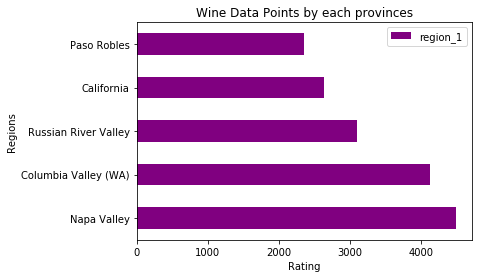

In [22]:
# each regions that show it reviews by data points
df['region_1'].value_counts().to_frame().head(5).plot(kind='barh', color=['purple'])
plt.xlabel('Rating')
plt.ylabel('Regions')
plt.title("Wine Data Points by each provinces")
plt.savefig(f"../Analysis/png_output/winepointprovinces")
plt.show()